# Data Cleaning

In [35]:
import numpy as np
import pandas as pd

In [36]:
file = "C:/Users/María Moya/Documents/GitHub/PROJECT_EDA_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE/src/data/Hello_Auto_data.xlsx"
df_customers = pd.read_excel(file,sheet_name = "Customers")
df_customers
df_customers.sample(12)

,policyId,customerId,age,province
64328,10735,179949,60.0,LÉRIDA
91618,15564,10729,41.0,MADRID
187836,37674,1622288,51.0,CÁDIZ
4650,672,1454,53.0,SEVILLA
165587,30927,158747,49.0,MÁLAGA
27789,4529,99388,43.0,CANTABRIA
134679,23661,1005464,33.0,SEVILLA
149926,26619,580112,47.0,CASTELLÓN
130463,22883,965226,42.0,ALMERÍA
77307,12947,194819,32.0,MADRID


In [37]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211506 entries, 0 to 211505
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   policyId    211506 non-null  int64  
 1   customerId  211506 non-null  int64  
 2   age         209510 non-null  float64
 3   province    211506 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 6.5+ MB


| Column          | Description  |
|-----------------|-----------------|
| policyId        | Número de identificación de póliza contratada| 
| customerId   | Número de identificación del cliente| 
| age | Años del cliente al contratar la póliza| 
| province  | Provincia del cliente|


In [38]:
#Duplicados
df_customers.duplicated(keep=False).sum()

np.int64(208811)

In [39]:
df_customers_cleaned = df_customers.drop_duplicates(keep = 'first')

In [40]:
df_customers_cleaned.duplicated(keep=False).sum()

np.int64(0)

In [41]:
df_customers_cleaned.province.value_counts()

province
MADRID                    12052
SEVILLA                    5971
BARCELONA                  5932
MÁLAGA                     3291
VALENCIA                   3268
CÁDIZ                      3084
MURCIA                     2823
LAS PALMAS                 2149
ALICANTE                   1937
ALMERÍA                    1877
TOLEDO                     1766
GRANADA                    1444
A CORUÑA                   1340
BALEARES                   1275
JAÉN                       1263
BIZKAIA                    1105
SANTA CRUZ DE TENERIFE     1086
GERONA                      956
TARRAGONA                   860
ASTURIAS                    823
CÓRDOBA                     785
HUELVA                      770
ZARAGOZA                    759
PONTEVEDRA                  694
VALLADOLID                  673
GUADALAJARA                 669
NAVARRA                     592
LÉRIDA                      527
CASTELLÓN                   506
BADAJOZ                     445
LEÓN                        438

In [42]:
#Valores nulos
df_customers_cleaned.isna().sum()

policyId        0
customerId      0
age           378
province        0
dtype: int64

In [43]:
df_customers_cleaned.dropna(subset=['age'], how='all', inplace = True)

C:\Users\María Moya\AppData\Local\Temp\ipykernel_4204\4122328501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers_cleaned.dropna(subset=['age'], how='all', inplace = True)


In [44]:
df_customers_cleaned.isna().sum()

policyId      0
customerId    0
age           0
province      0
dtype: int64

# Análisis Univariante

In [45]:
# Selección
df_tipificacion = pd.DataFrame([df_customers_cleaned.nunique(), df_customers_cleaned.nunique()/len(df_customers_cleaned) * 100, df_customers_cleaned.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
policyId,44070,68.303343,int64
customerId,31600,48.976302,int64
age,68,0.105392,float64
province,50,0.077494,object


In [46]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
policyId,44070,68.303343,int64,Numerica Continua
customerId,31600,48.976302,int64,Numerica Continua
age,68,0.105392,float64,Numerica Discreta
province,50,0.077494,object,Numerica Discreta


In [47]:
df_customers_cleaned.describe().loc["mean"]

policyId       19617.365571
customerId    650522.675222
age               41.521520
Name: mean, dtype: float64

In [48]:
df_customers_cleaned.describe().loc["50%"] # Mediana

policyId       18459.0
customerId    479953.0
age               41.0
Name: 50%, dtype: float64

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Frecuencia Absoluta
df_customers_cleaned.province.value_counts()

province
MADRID                    12031
SEVILLA                    5967
BARCELONA                  5931
VALENCIA                   3267
CÁDIZ                      3084
MÁLAGA                     3022
MURCIA                     2821
LAS PALMAS                 2149
ALICANTE                   1931
ALMERÍA                    1877
TOLEDO                     1766
GRANADA                    1442
A CORUÑA                   1338
BALEARES                   1270
JAÉN                       1204
BIZKAIA                    1101
SANTA CRUZ DE TENERIFE     1086
GERONA                      956
TARRAGONA                   860
ASTURIAS                    823
CÓRDOBA                     785
HUELVA                      770
ZARAGOZA                    759
PONTEVEDRA                  694
VALLADOLID                  673
GUADALAJARA                 669
NAVARRA                     592
LÉRIDA                      527
CASTELLÓN                   506
BADAJOZ                     445
LEÓN                        438

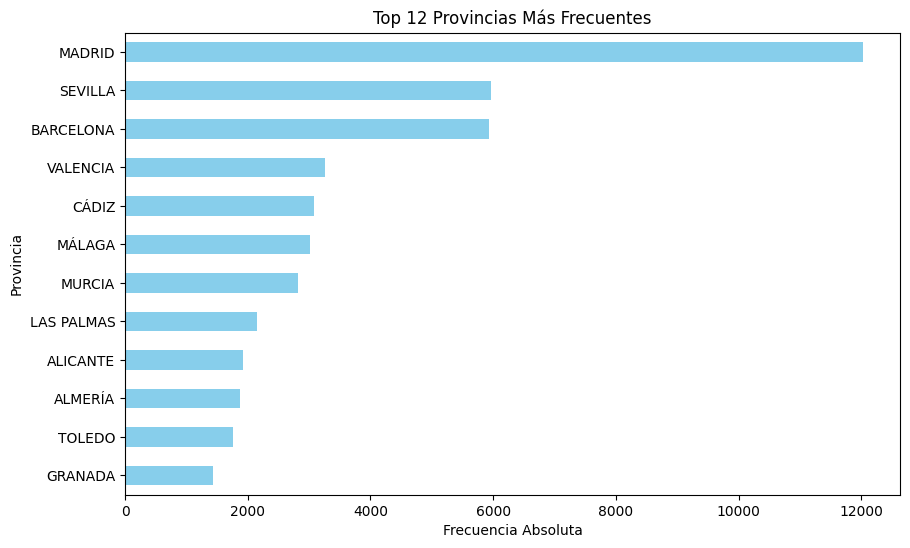

In [51]:
df_customers_cleaned.province.value_counts(ascending=False).head(12).plot(
    kind="barh", 
    figsize=(10, 6),  # Tamaño opcional de la gráfica
    color="skyblue",  # Color opcional
    title="Top 12 Provincias Más Frecuentes"
)
plt.xlabel("Frecuencia Absoluta")
plt.ylabel("Provincia")
plt.gca().invert_yaxis()  # Invertir eje Y para que el valor más alto esté arriba
plt.show()

In [52]:
# Frecuencia Relativa
(df_customers_cleaned.province.value_counts()/len(df_customers_cleaned))*100

province
MADRID                    18.646642
SEVILLA                    9.248152
BARCELONA                  9.192356
VALENCIA                   5.063468
CÁDIZ                      4.779839
MÁLAGA                     4.683746
MURCIA                     4.372220
LAS PALMAS                 3.330699
ALICANTE                   2.992824
ALMERÍA                    2.909130
TOLEDO                     2.737093
GRANADA                    2.234931
A CORUÑA                   2.073743
BALEARES                   1.968351
JAÉN                       1.866059
BIZKAIA                    1.706421
SANTA CRUZ DE TENERIFE     1.683173
GERONA                     1.481688
TARRAGONA                  1.332899
ASTURIAS                   1.275554
CÓRDOBA                    1.216658
HUELVA                     1.193410
ZARAGOZA                   1.176361
PONTEVEDRA                 1.075619
VALLADOLID                 1.043071
GUADALAJARA                1.036872
NAVARRA                    0.917531
LÉRIDA             

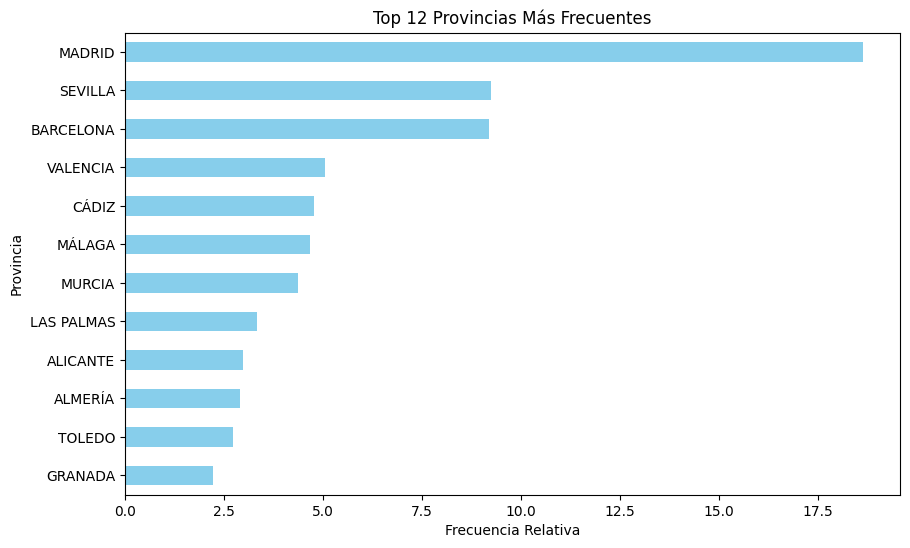

In [53]:
((df_customers_cleaned.province.value_counts(ascending=False)/len(df_customers_cleaned))*100).head(12).plot(
    kind="barh", 
    figsize=(10, 6),  # Tamaño opcional de la gráfica
    color="skyblue",  # Color opcional
    title="Top 12 Provincias Más Frecuentes"
)
plt.xlabel("Frecuencia Relativa")
plt.ylabel("Provincia")
plt.gca().invert_yaxis()  # Invertir eje Y para que el valor más alto esté arriba
plt.show()

In [54]:
# Percentil
print(df_customers_cleaned.age.quantile(0.5),
    df_customers_cleaned.age.quantile(0.9), 
    df_customers_cleaned.age.quantile(0.95),
    df_customers_cleaned.age.max())

41.0 57.0 62.0 86.0


In [55]:
df_customers_cleaned.age.describe()

count    64521.000000
mean        41.521520
std         11.753854
min         19.000000
25%         34.000000
50%         41.000000
75%         49.000000
max         86.000000
Name: age, dtype: float64

In [56]:
# Cuartil
def get_IQR(df_customers_cleaned, col):
    return df_customers_cleaned[col].quantile(0.75) - df_customers_cleaned[col].quantile(0.25)

In [57]:
get_IQR(df_customers_cleaned,"age")

np.float64(15.0)

In [58]:
df_customers_cleaned.describe().loc["50%"] # IQR(Rango intercuartílico)<Mediana , variable dispersa

policyId       18459.0
customerId    479953.0
age               41.0
Name: 50%, dtype: float64

In [59]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [60]:
# BoxPlots
columnas_numericas_customers = df_customers_cleaned.describe().T.index.to_list()
print(columnas_numericas_customers)

['policyId', 'customerId', 'age']


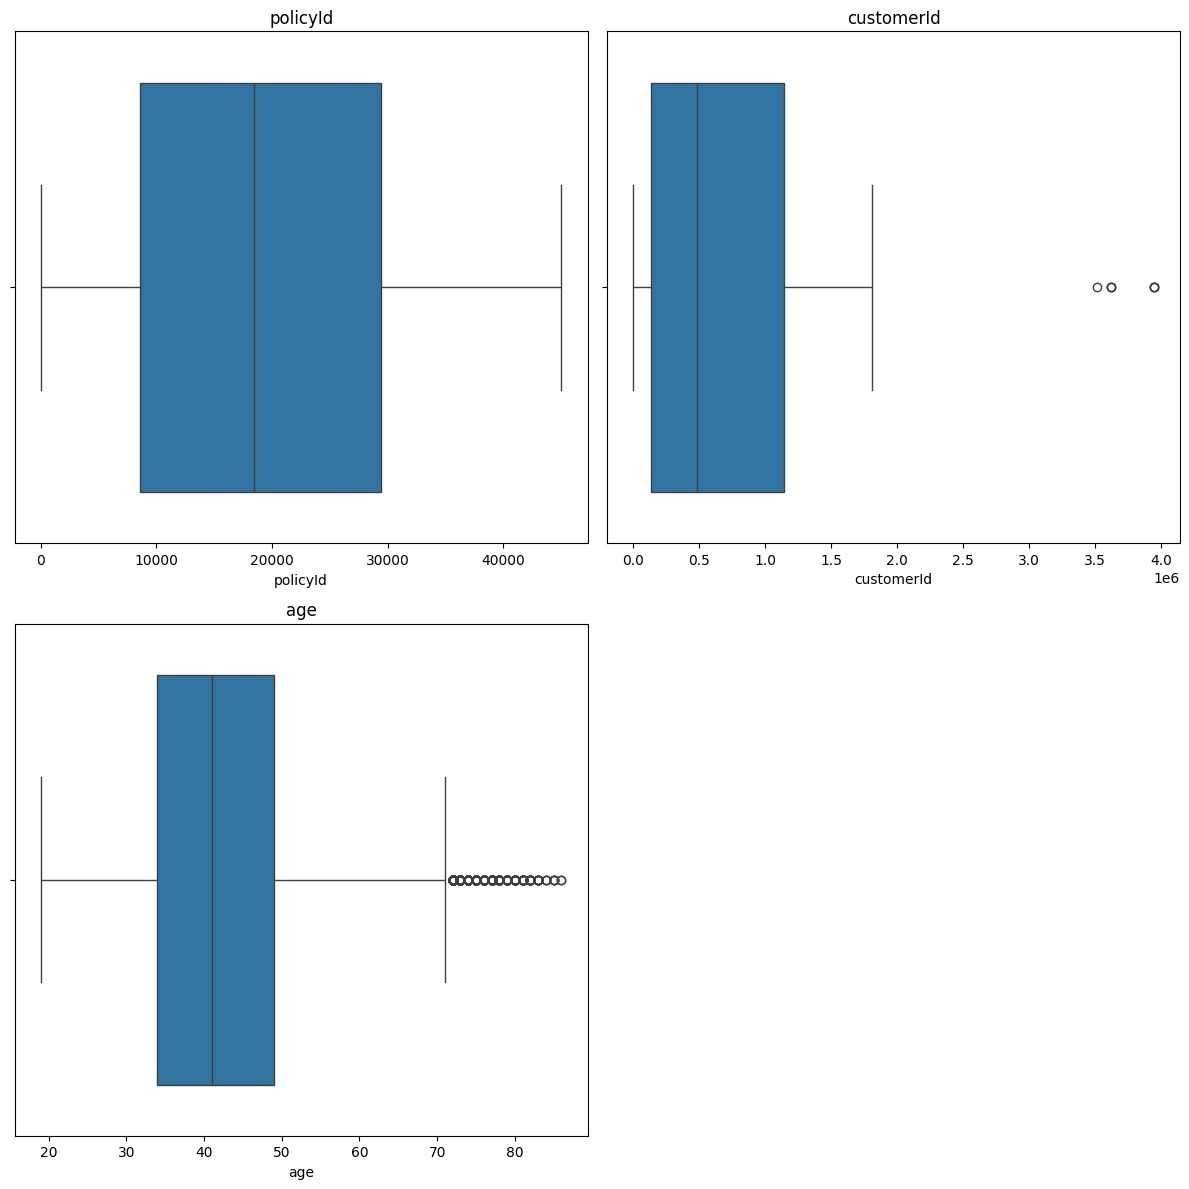

In [61]:
plot_multiple_boxplots(df_customers_cleaned, columnas_numericas_customers)

In [62]:
# Age, cierta dispersión con valores muy dispares

In [63]:
# Coeficiente de variación (CV)
def variabilidad(df):
    df_var=df_customers_cleaned.describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var

In [64]:
variabilidad(df_customers_cleaned) # Variabilidad baja, age

,std,mean,CV
policyId,12754.504892,19617.365571,0.650164
customerId,571228.801218,650522.675222,0.878107
age,11.753854,41.521520,0.283079


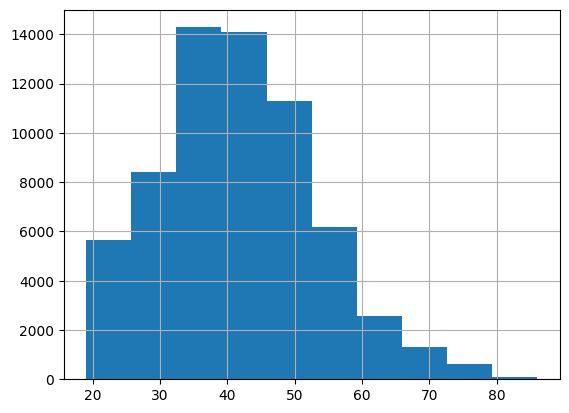

In [65]:
df_customers_cleaned["age"].hist();

In [66]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

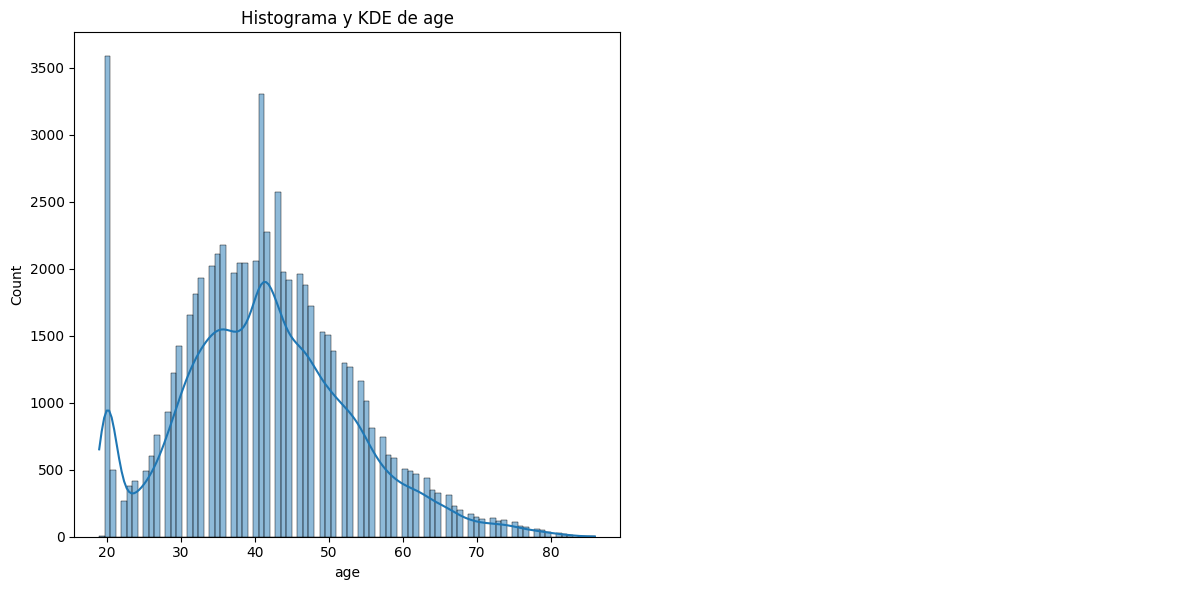

In [67]:
plot_histo_den(df_customers_cleaned,["age"])

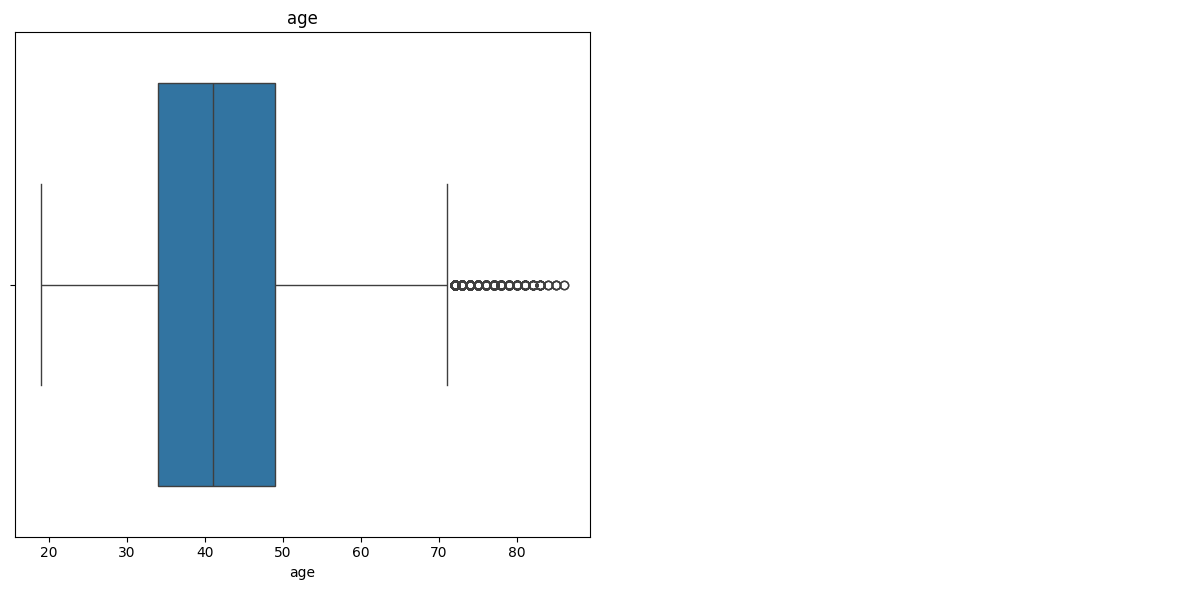

In [68]:
plot_multiple_boxplots(df_customers_cleaned,["age"])